# Sample Neural Network in R
## This dataset is one that I modified slightly from the original Kaggle one. It lists hypothetical bank loan information. For each client, we see the client ID, income per year, attained age, loan amount, ratio of loan to income, and whether or not the person defaulted on this loan (0=no, 1=yes). 

## Your task is to train a neural network to be able to predict whether future loans will default, based on income, age, and loan amount.

- Dave Snell - DSCI 508

In [4]:
install.packages("neuralnet") # the neuralnet package will do almost all of the work for us
library(neuralnet)

# NOTE: replace the path command below with your own location for the dataset
# For a single input dataset, this is an extra step; but if you had several input/output files it would help 
# keep them organized and reduce the places where you would have to change your code later.
path <- 'data/'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Occasionally, you will get a message like this, stating your version of R is not the same version as the one this package was built under. Often it is OK; but if you want to check your version, you can do so as follows:

In [1]:
R.Version()

$platform
[1] "x86_64-apple-darwin13.4.0"

$arch
[1] "x86_64"

$os
[1] "darwin13.4.0"

$system
[1] "x86_64, darwin13.4.0"

$status
[1] ""

$major
[1] "4"

$minor
[1] "5.2"

$year
[1] "2025"

$month
[1] "10"

$day
[1] "31"

$`svn rev`
[1] "88974"

$language
[1] "R"

$version.string
[1] "R version 4.5.2 (2025-10-31)"

$nickname
[1] "[Not] Part in a Rumble"

### One of the first steps in a machine learning training exercise is to get your data. Usually, real data is messy; but we are going to use a dataset that has been pre-cleaned for us since the purpose of this demonstration is to show how easy it can be to run a neural network.

In [9]:
# Get the current working directory
current_directory <- getwd()
print(current_directory)

[1] "/Users/matt/Dev/Maryville/DSCI-508/Notebooks"


In [24]:
path <- 'data/'
fullName <- paste(path,'MyLoans.csv',sep='') # by default, R's paste function inserts a space between items
# we are overriding that via the sep='' meaning we want no separator between the path and the file name.
credit_data <- read.csv(fullName,TRUE,",") # read the comma-separated file assuming column headers exist, 
# and there are commas between values

#print the first few lines
head(credit_data) # the known_value column shows whether the load defaulted (1=yes)

,clientid,Inc,attained.age,borrowed,redundant_feature,answer
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,66155.93,59.01702,8106.5321,0.122536751,0
2,2,34415.15,48.11715,6564.7450,0.190751581,0
3,3,57317.17,63.10805,8020.9533,0.139939800,0
4,4,42709.53,45.75197,6103.6423,0.142910532,0
5,5,66952.69,18.58434,8770.0992,0.130989500,1
6,6,24904.06,57.47161,15.4986,0.000622332,0


In [29]:
# normalize the dataset
# this function performs a quick and simple normalization 
normalize <- function(x) {return( (x-min(x)) / (max(x)-min(x)) )}

# NOTE: Looking at the data, we see that the loan_to_income column is simply loan/income so 
# it is not an independent feature. Our training will go better if we exclude this column.
normalized_credit_data <- as.data.frame(lapply(credit_data[2:4], normalize)) # just normalize the 3 input data columns
#add the labels as a 'known_value' column
normalized_credit_data$answer <- credit_data$answer
normalized_credit_data[1:5,] # show the first 5 and the last 5 rows of the data
normalized_credit_data[1996:2000,]

,Inc,attained.age,borrowed,answer
,<dbl>,<dbl>,<dbl>,<int>
1,0.9231759,0.8920917,0.5888374,0
2,0.2881216,0.6547079,0.4768270,0
3,0.7463343,0.9811888,0.5826201,0
4,0.4540717,0.6031975,0.4433280,0
5,0.9391172,0.0115241,0.6370454,1


,Inc,attained.age,borrowed,answer
,<dbl>,<dbl>,<dbl>,<int>
1996,0.7844261,0.6634417,0.1398763,1
1997,0.9904052,0.1112215,0.2544048,1
1998,0.4861220,0.2169581,0.4011289,1
1999,0.4750100,1.0000000,0.1177903,1
2000,0.9888137,0.8297091,0.5359703,1


In [30]:
#split the dataset into training and test dataset
# the dataset consists of 2000 observations, so take 70% for training
training_data <- normalized_credit_data[1:1400,]
# set aside 20% for test
test_data <- normalized_credit_data[1401:1800,]
# let's also set aside another 10% for validation (or for another test)
validation_data <- normalized_credit_data[1801:2000,]

In [31]:
#training the neural network
# this step may take a while (depending upon your computing facility)
neural_network <- neuralnet(answer~Inc+attained.age+borrowed, training_data, hidden=5, 
                            act.fct = "logistic", linear.output = FALSE)

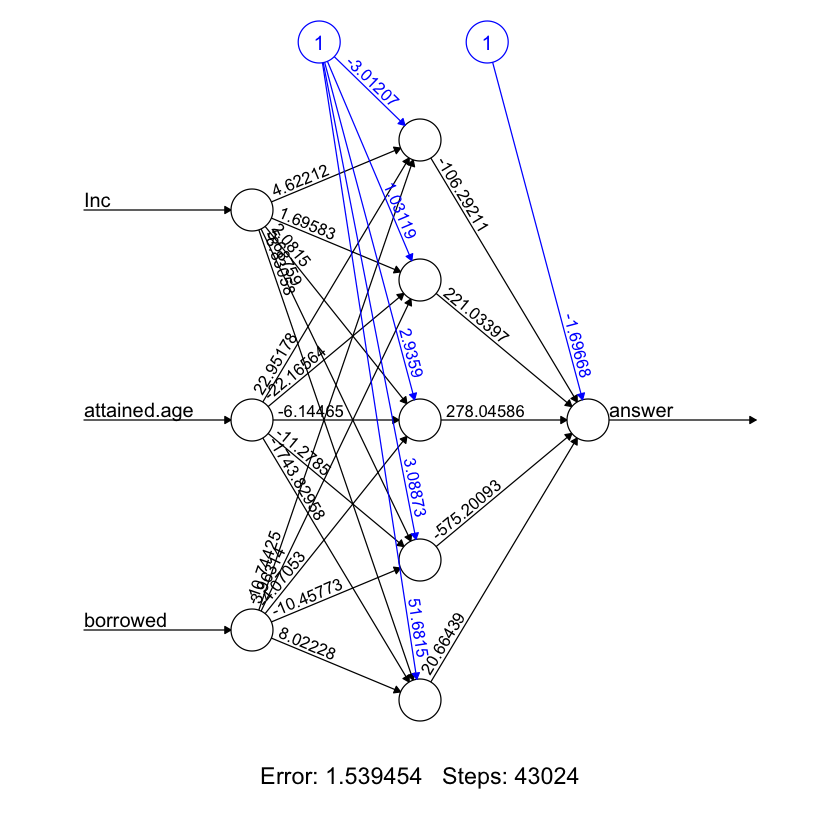

In [32]:
# Let's plot the neural network architecture.
# This is incredibly cool! You will see all of the weights that were calculated during the training process.
plot(neural_network, rep="best")

In [37]:
# We just need the features for testing so remove the column known_value (the answers).
test_data2 <- subset(test_data,select=c("Inc","attained.age","borrowed")) # and don't take the loan_to_income column
head(test_data,n=9) # show the first 9 lines before abnd after removing the answers
head(test_data2,n=9)

,Inc,attained.age,borrowed,answer
,<dbl>,<dbl>,<dbl>,<int>
1401,0.4843376,0.8233684,0.54066731,0
1402,0.9568550,0.6474213,0.40741605,0
1403,0.6801598,0.6828621,0.06417572,1
1404,0.6446342,0.6518190,0.67233453,0
1405,0.1682361,0.9499018,0.38369755,0
1406,0.6524243,0.7048286,0.08390624,0
1407,0.1124792,0.8216389,0.08996295,0
1408,0.8168762,0.9190564,0.48003980,0
1409,0.3343909,0.8739641,0.52933788,0


,Inc,attained.age,borrowed
,<dbl>,<dbl>,<dbl>
1401,0.4843376,0.8233684,0.54066731
1402,0.9568550,0.6474213,0.40741605
1403,0.6801598,0.6828621,0.06417572
1404,0.6446342,0.6518190,0.67233453
1405,0.1682361,0.9499018,0.38369755
1406,0.6524243,0.7048286,0.08390624
1407,0.1124792,0.8216389,0.08996295
1408,0.8168762,0.9190564,0.48003980
1409,0.3343909,0.8739641,0.52933788


In [35]:
#predict the test dataset
predictions <- compute(neural_network, test_data2)
head(predictions$net.result,n=9)

1401,2.007608e-43
1402,2.740444e-19
1403,3.127025e-39
1404,2.977619e-38
1405,1.095753e-45
1406,1.315979e-27
1407,1.930920e-36
1408,7.994584e-42
1409,3.206367e-45


In [36]:
#round the predictions (0 or 1) so that we can easily compare to the known_value
predictions <- round(predictions$net.result)
head(predictions,n=9)

1401,0
1402,0
1403,0
1404,0
1405,0
1406,0
1407,0
1408,0
1409,0


In [18]:
#accuracy of the model
mean(test_data$known_value==predictions)


[1] 0.995

## That was a high level of accuracy. Let's try the model on another set of test data (our validation set).

In [43]:
validation_data2 <- subset(validation_data,select=c("Inc","attained.age","borrowed"))
head(validation_data,n=9)
head(validation_data2,n=9)

,Inc,attained.age,borrowed,answer
,<dbl>,<dbl>,<dbl>,<int>
1801,0.4652032,0.5812303,0.4498977,0
1802,0.9561237,0.6747624,0.9765648,0
1803,0.7081506,0.5502937,0.7482127,0
1804,0.9410420,0.8057619,0.7874169,0
1805,0.4051145,0.7348903,0.4747279,0
1806,0.5284589,0.9537148,0.4119293,0
1807,0.5381365,0.1170773,0.3096678,0
1808,0.7471823,0.3645756,0.7272263,1
1809,0.2912058,0.9927881,0.4542897,0


,Inc,attained.age,borrowed
,<dbl>,<dbl>,<dbl>
1801,0.4652032,0.5812303,0.4498977
1802,0.9561237,0.6747624,0.9765648
1803,0.7081506,0.5502937,0.7482127
1804,0.9410420,0.8057619,0.7874169
1805,0.4051145,0.7348903,0.4747279
1806,0.5284589,0.9537148,0.4119293
1807,0.5381365,0.1170773,0.3096678
1808,0.7471823,0.3645756,0.7272263
1809,0.2912058,0.9927881,0.4542897


In [44]:
predictions2 <- compute(neural_network, validation_data2)
head(predictions2$net.result,n=9)
# Note that loan #1080 above went into default. The predicited value below is not exactly 1, but very close to it.

1801,1.569108e-26
1802,8.443637e-43
1803,3.003613e-33
1804,3.345912e-43
1805,6.841233e-40
1806,4.027276e-44
1807,3.301780e-51
1808,9.999999e-01
1809,3.559832e-46


In [45]:
#round the predictions (0 or 1) so that we can easily compare to the known_value
predictions2 <- round(predictions2$net.result)
head(predictions2,n=9)

1801,0
1802,0
1803,0
1804,0
1805,0
1806,0
1807,0
1808,1
1809,0


In [47]:
# determine the accuracy of the model
mean(validation_data$answer==predictions2)

[1] 0.955

In [16]:
# This is also a very high level of accuracy.
# Ideas for the future:
# perhaps the data should be shuffled (randomized first) to offset possible correlations in the order


# Asssignment:
1. Copy the dataset to the name MyLoans.csv and change the last 5 loans to default (known_value=1)
2. Change the column headings to Inc, "atttained age", borrowed, redundant_feature, and answer
3. Adjust the code accordingly to train on this new dataset.
4. Report the values you get for the test set and for the validation set
5. Report the value you get for the training set (hint: see the plot produced)
6. We have used this as a classification application (0 or 1 for output). How would you change this to make it a regression application (probability of default)?
7. What was the purpose of this assignment? What can you do now as a result of accomplishing it?


In [49]:
training_data2 <- subset(training_data,select=c("Inc","attained.age","borrowed")) 

In [51]:
predictions3 <- compute(neural_network, training_data2)
head(predictions3$net.result,n=9)

1,4.170134e-42
2,6.045979e-38
3,2.864974e-45
4,1.332684e-28
5,9.992374e-01
6,1.698939e-35
7,7.922369e-05
8,9.973864e-01
9,1.351764e-39


In [52]:
#round the predictions (0 or 1) so that we can easily compare to the known_value
predictions3 <- round(predictions3$net.result)
head(predictions3,n=9)

1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,1
9,0


In [54]:
# determine the accuracy of the model
mean(training_data$answer==predictions3)

[1] 0.9978571

In [55]:
neural_network <- neuralnet(answer~Inc+attained.age+borrowed, training_data, hidden=5, 
                            act.fct = "logistic", linear.output = FALSE)

ERROR: Error: Unknown activation function.
